<a href="https://colab.research.google.com/github/Aymericy/Ustyugiov-M/blob/main/Lab_(4_2)_4_course_Ustiugov_M_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных и их оценка


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes.csv")
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
             87       0              23             0        28.9  0.773                     25   0          1
                      58             16             52       32.7  0.166                     25   0          1
17           163      72             41             114      40.9  0.817                     47   1          1
Name: count, Length: 768, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
df.info()
dfvc = df.value_counts('Outcome') #Данные не сбалансированы относительно оуткоме 500/268
dfvc = d1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count
Outcome,
0,500
1,268


<Axes: >

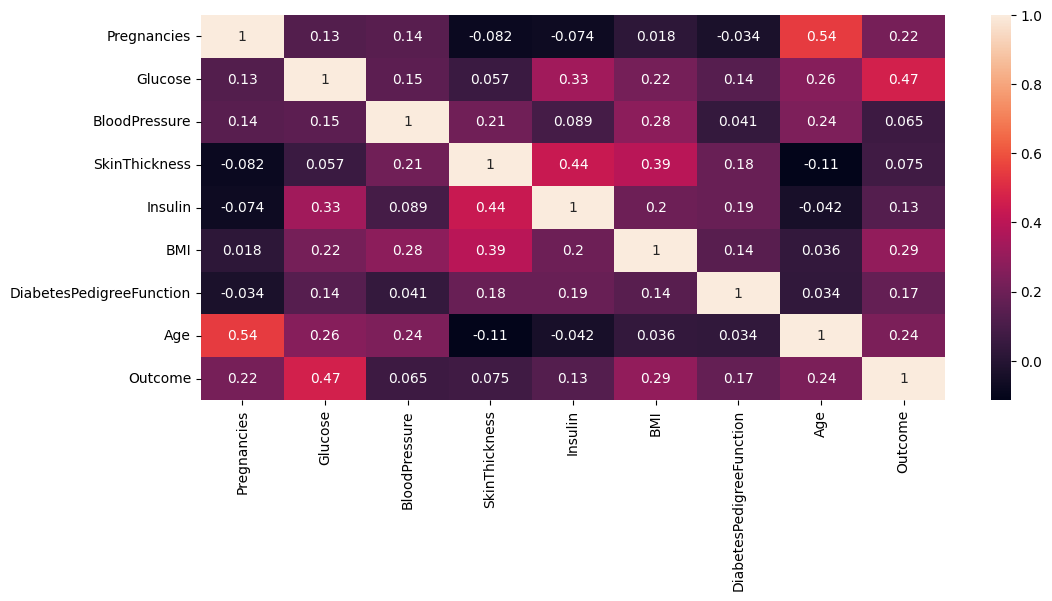

In [ ]:
df.describe()
df.corr() #постмотрим на корреляцию данных с Outcome
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

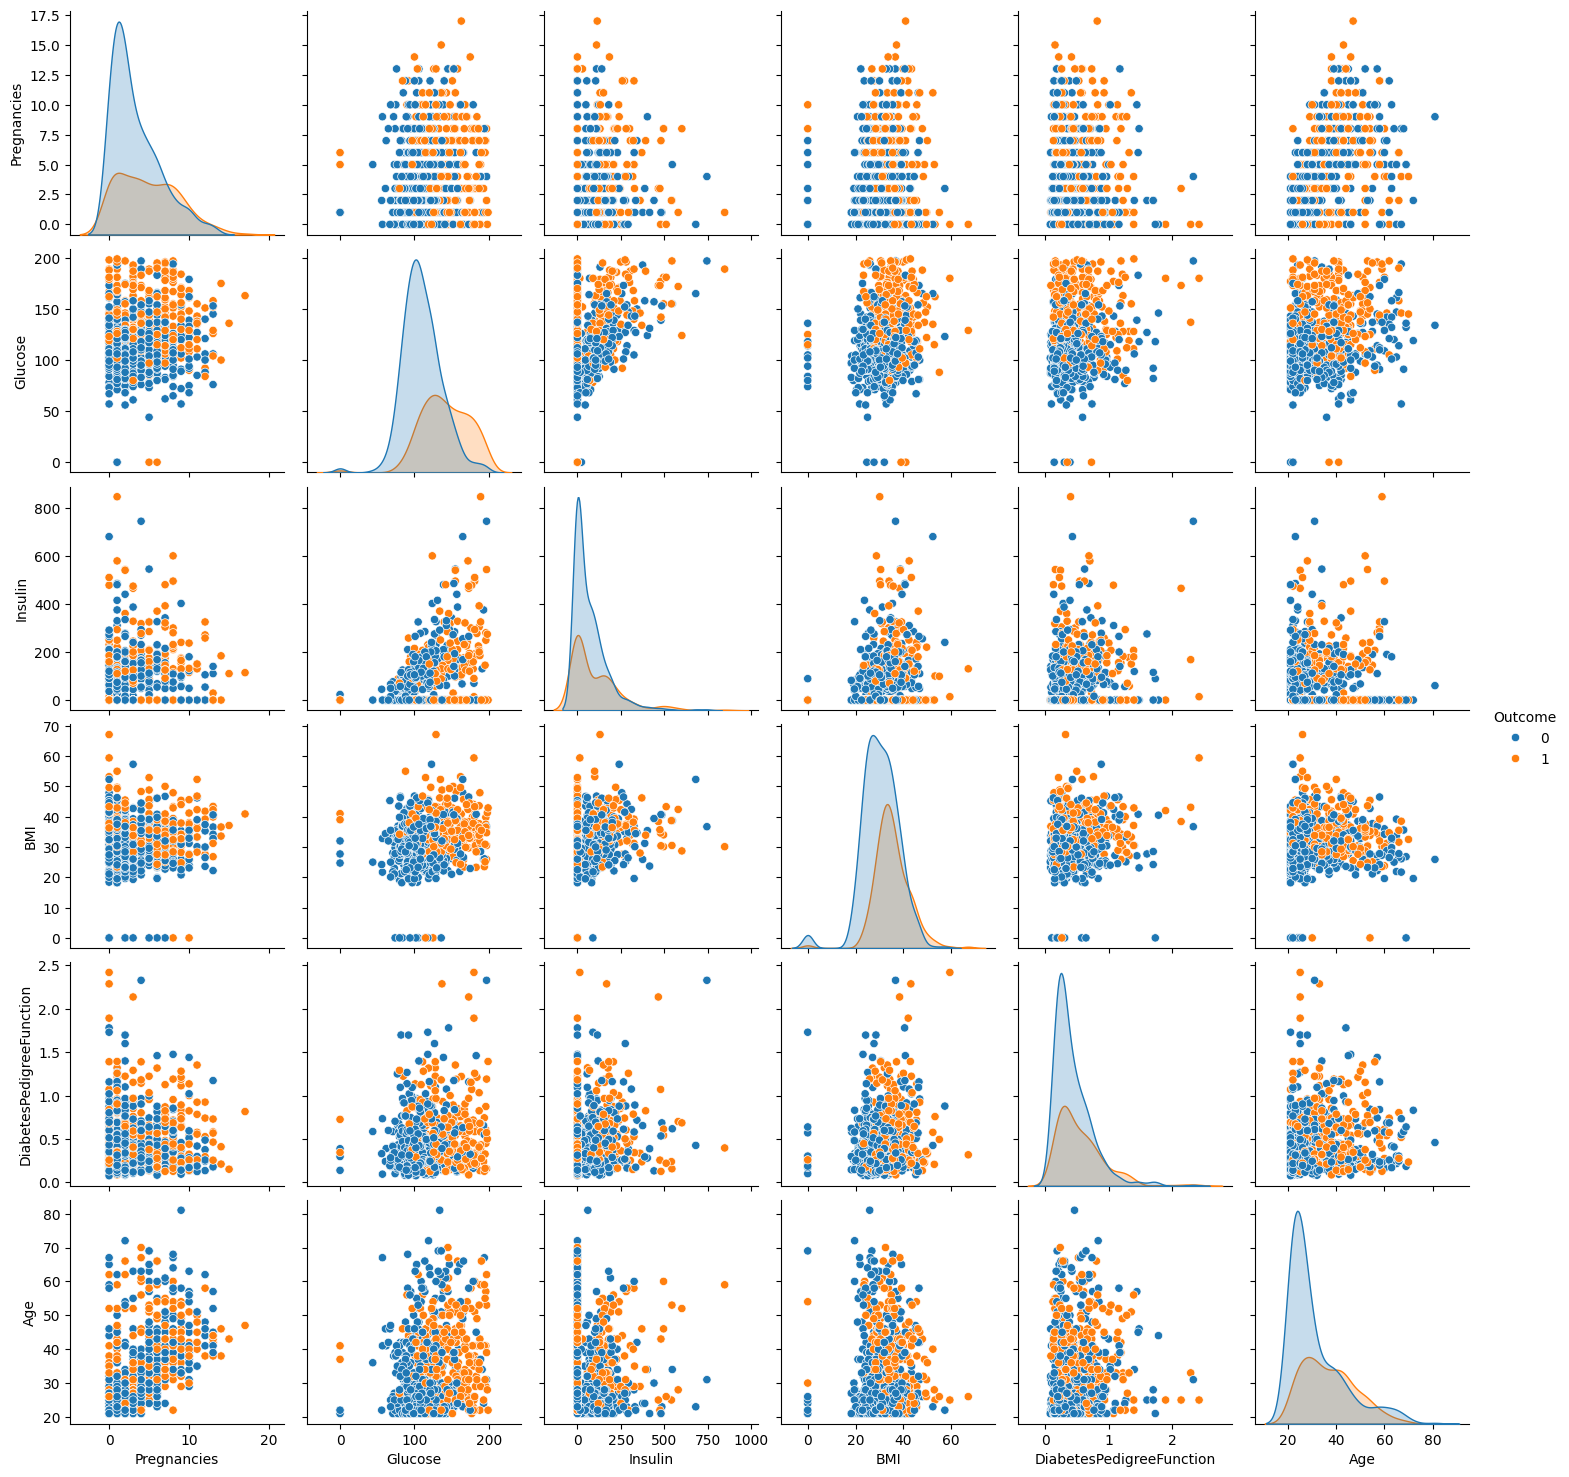

In [ ]:
dfg = df[['Pregnancies', 'Glucose','Insulin', 'BMI','DiabetesPedigreeFunction','Age','Outcome']]
sns.pairplot(dfg, hue ="Outcome")

#Машинное обучение, модели и все сопутствующие приколы



In [ ]:
from sklearn.model_selection import train_test_split #Разбиваем датасет, с выбранными признаками, на Х и у
X = dfg.drop('Outcome', axis=1)
y = df['Outcome']
X

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [ ]:
#Делим на тестовые и обучающие наборы. Размер тестовых данных 10% и значение random_state=101. ДЛЯ НОРМАЛИЗАЦИИ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
#Делим на тестовые и обучающие наборы. Размер тестовых данных 10% и значение random_state=101. ДЛЯ НЕ НОРМАЛИЗАЦИИ
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
#Нормализация
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#Логистическая регрессия

In [ ]:
#Не нормализованная модель
lr = LogisticRegression() # Создаем экземпляр класса
lr.fit(X1_train, y1_train)  # Обучаем
y1_pred = lr.predict(X1_test) # Делаем предсказание на тестовой выборке
print(classification_report(y1_test, y1_pred)) #оценка качества модели на тестовой выборке


              precision    recall  f1-score   support

           0       0.83      0.91      0.86        53
           1       0.74      0.58      0.65        24

    accuracy                           0.81        77
   macro avg       0.78      0.74      0.76        77
weighted avg       0.80      0.81      0.80        77



In [ ]:
#Нормализованная модель
lr = LogisticRegression() # Создаем экземпляр класса
lr.fit(X_train, y_train)  # Обучаем
y_pred = lr.predict(X_test) # Делаем предсказание на тестовой выборке
print(classification_report(y_test, y_pred)) #оценка качества модели на тестовой выборке


              precision    recall  f1-score   support

           0       0.83      0.91      0.86        53
           1       0.74      0.58      0.65        24

    accuracy                           0.81        77
   macro avg       0.78      0.74      0.76        77
weighted avg       0.80      0.81      0.80        77



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
results = cross_val_score(lr, X,y)
results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.75974026, 0.74675325, 0.77922078, 0.79738562, 0.76470588])

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
logitcv = LogisticRegressionCV(max_iter = 1000)
logitcv.fit(X_train, y_train)
a = print("Доля правильных ответов классификатора на обучающей выборке:", round(logitcv.score(X_train, y_train), 3))


Доля правильных ответов классификатора на обучающей выборке: 0.774


In [ ]:
#Организуем подбор гиперпараметра и посмотрим как изменится качество модели

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

parameters = {'C':[0.01, 0.1, 0.5, 1, 5,6,7, 10, 50, 100, 500, 1000,2000,5000]}

logit = LogisticRegression(max_iter = 1000)

grid = GridSearchCV(logit, parameters)
grid.fit(X, y)

grid.best_estimator_ # лучшая модель


LogisticRegression(C=5, max_iter=1000)

In [ ]:
logit = LogisticRegression(C=5,max_iter=1000)
logit.fit(X_train, y_train)
print("Доля правильных ответов классификатора на обучающей выборке:", round(logit.score(X_train, y_train), 3))#
#Не улучшилась модель при подборе оптимального гиперпараметра, значит попробуем другую модель

Доля правильных ответов классификатора на обучающей выборке: 0.774


#**Модель К-ближайших соседей**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import *
model_KN = KNeighborsRegressor(n_neighbors=15)
model_KN.fit(X_train, y_train)
y_pred_KN = model_KN.predict(X_test)



In [ ]:
#Оптимизация и подбор гиперпараметра методом оптуны
!pip install optuna
import optuna as optuna

def objective(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 50)
    }
    model = KNeighborsRegressor(**params)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    return metrics.mean_squared_error(y_test, predict, squared=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000);
study.best_params
#Результат 15 нейборов

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


[I 2024-10-02 13:42:05,824] A new study created in memory with name: no-name-0ac2ea20-5755-477e-9d69-c91285388b1c
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-10-02 13:42:05,833] Trial 0 finished with value: 0.3849634326502145 and parameters: {'n_neighbors': 44}. Best is trial 0 with value: 0.3849634326502145.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-10-02 13:42:05,841] Trial 1 finished with value: 0.3897087636530153 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.3849634326502145.
/usr/local/lib/python3.10/dist-packages/skle

{'n_neighbors': 15}

In [ ]:
#Подбор параметра гридом сеткой

parameters = {'n_neighbors':[1, 2, 3, 4, 5,6,7, 10, 11, 12, 13, 14,14,15,16,17,18,19,20]}
KNR = KNeighborsRegressor(n_neighbors = any)
grid = GridSearchCV(KNR, parameters)
grid.fit(X, y)

grid.best_estimator_ # лучшая модель
#Результат 13 нейборов


KNeighborsRegressor(n_neighbors=13)

In [ ]:
KNR = KNeighborsRegressor(n_neighbors = 13)
KNR.fit(X_train,y_train)
print("Доля правильных ответов классификатора на обучающей выборке:", round(KNR.score(X_train, y_train), 3))



Доля правильных ответов классификатора на обучающей выборке: 0.36


#Другие модели


In [ ]:
model_Ridge = linear_model.Ridge()
model_Ridge.fit(X_train, y_train)
y_pred_Ridge = model_Ridge.predict(X_test)
print("Доля правильных ответов классификатора на обучающей выборке:", round(model_Ridge.score(X_train, y_train), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.292


In [ ]:
model_Lasso = linear_model.Lasso(alpha=0.011)
model_Lasso.fit(X_train, y_train)
y_pred_Lasso = model_Lasso.predict(X_test)
print("Доля правильных ответов классификатора на обучающей выборке:", round(model_Lasso.score(X_train, y_train), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.29


In [ ]:
model_SVM = svm.SVR()
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)
print("Доля правильных ответов классификатора на обучающей выборке:", round(model_SVM.score(X_train, y_train), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.454


In [ ]:
model_tree = tree.DecisionTreeRegressor(max_depth=15)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print("Доля правильных ответов классификатора на обучающей выборке:", round(model_tree.score(X_train, y_train), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.978
